In [12]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [13]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shabnam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
data=pd.read_csv("Reviews.csv")
data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [15]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [16]:
data.shape[0]

568454

In [17]:
data=data[["Summary","Score"]]

In [18]:
data=data.sample(frac=1)[:20000]

In [19]:
data.loc[data.Score<3, "Score"] = -1
data.loc[data.Score==3, "Score"] = 0
data.loc[data.Score>3, "Score"] = 1

In [20]:
data.head()

,Summary,Score
49300,"Satisfying, nutritional snack",1
392784,No good.,-1
313561,no more puking,1
330031,"Great treat, dog loves them!",1
40782,great for allergies!,1


In [21]:
data['Summary'] = data['Summary'].str.replace(r'[^\w\s]+', '')
data['Summary']=data['Summary'].str.replace('\d+', ' ')
data["Summary"]= data["Summary"].str.lower()


In [22]:
data.head()

,Summary,Score
49300,satisfying nutritional snack,1
392784,no good,-1
313561,no more puking,1
330031,great treat dog loves them,1
40782,great for allergies,1


In [23]:
data['Summary'].dropna(inplace=True)

In [24]:
data["Summary"]=data["Summary"].apply(nltk.word_tokenize)

In [25]:
data.head()

,Summary,Score
49300,"[satisfying, nutritional, snack]",1
392784,"[no, good]",-1
313561,"[no, more, puking]",1
330031,"[great, treat, dog, loves, them]",1
40782,"[great, for, allergies]",1


In [26]:
from nltk.corpus import stopwords
nltk.download('stopwords')
#stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shabnam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
stop=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'other','some', 'such', 'own', 'same', 'so', 'than', 's', 't', 'can', 'will', 'just', 'don', 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'ma', 'mustn', 'needn', 'shan']

In [28]:
data['Summary']=(data['Summary'].dropna()
                 .apply(lambda x: [item for item in x if item not in stop]))                               

In [29]:
data.head()

,Summary,Score
49300,"[satisfying, nutritional, snack]",1
392784,"[no, good]",-1
313561,"[no, more, puking]",1
330031,"[great, treat, dog, loves]",1
40782,"[great, allergies]",1


In [30]:
ps=PorterStemmer()
data["Summary"]=(data["Summary"].dropna()
                 .apply(lambda x: ' '.join([ps.stem(i) for i in x])))

In [31]:
data.head()

,Summary,Score
49300,satisfi nutrit snack,1
392784,no good,-1
313561,no more puke,1
330031,great treat dog love,1
40782,great allergi,1


In [32]:
data['Summary'] = data['Summary'].str.replace(r'[^\w\s]+', '')

In [33]:
data.head()

,Summary,Score
49300,satisfi nutrit snack,1
392784,no good,-1
313561,no more puke,1
330031,great treat dog love,1
40782,great allergi,1


In [34]:
X=data["Summary"]
Y=data["Score"]

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X1=cv.fit_transform(X.values.astype('U')).toarray()

In [36]:
X1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y,test_size=0.2)

In [38]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [39]:
model.fit(x_train,y_train)

C:\Users\shabnam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
model.score(x_test,y_test)

0.83

In [41]:
y_pred=model.predict(x_test)

In [42]:
from sklearn import metrics 
print("Random Forest model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Random Forest model accuracy(in %): 83.0


In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 366,   62,  161],
       [  63,   56,  172],
       [ 144,   78, 2898]], dtype=int64)

Text(33.0, 0.5, 'Truth')

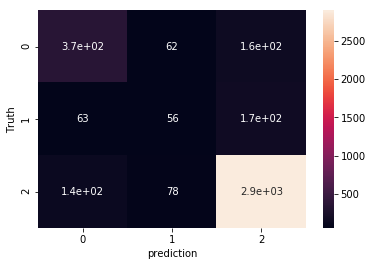

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel("prediction")
plt.ylabel("Truth")

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\shabnam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shabnam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
lr.score(x_test,y_test)

0.8355

In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 366,   62,  161],
       [  63,   56,  172],
       [ 144,   78, 2898]], dtype=int64)

Text(33.0, 0.5, 'Truth')

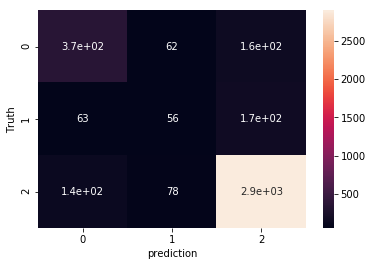

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel("prediction")
plt.ylabel("Truth")

In [50]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
y_pred = gnb.predict(x_test) 

In [52]:
gnb.score(x_test,y_test)

0.279

In [53]:
from sklearn.svm import SVC
sc=SVC()

In [ ]:
sc.fit(x_train,y_train)

In [ ]:
sc.score(x_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel("prediction")
plt.ylabel("Truth")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=125,p=3)

In [ ]:
classifier.fit(x_train,y_train)

In [ ]:
classifier.score(x_test,y_test)

In [ ]:
review=" bad product"
senti=cv.predict(cv.transform([review]))[0]
if(senti==1):
  print("Positive Sentiment")
if(senti==-1):
    print("Negative Sentiment")
if(senti==0):
  print("neutral Sentiment")